**Este notebook apresenta um tutorial para a criação de gráfico de barras univariado utilizando Python, conforme o exemplo abaixo.**

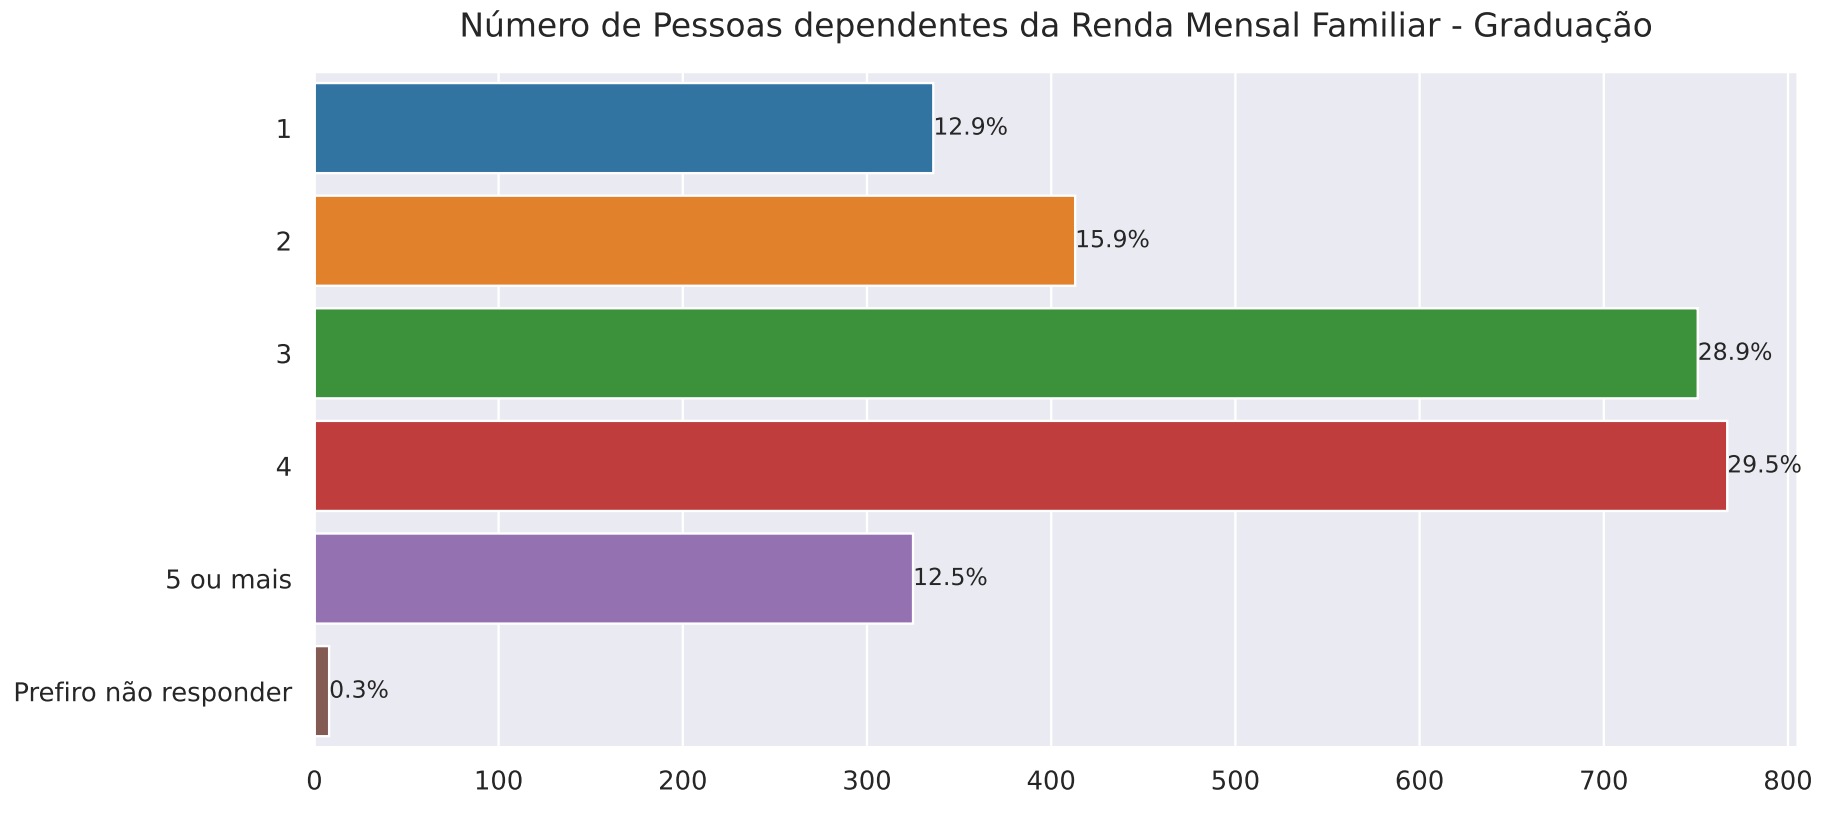

**Figura 4.2.8: Número de pessoas dependentes da renda mensal familiar por alunos de graduação (QPRIP, 2024).**



> Veja  mais sobre acessibilidade cromática para daltonismo: https://repositorio.ufsm.br/bitstream/handle/1/24809/guia-modo-padr%C3%A3o.pdf?sequence=3&isAllowed=y





---



**Passo 1: Preparar os dados**

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar base de dados
df = pd.read_csv('exemplos_QPRIP.csv')

In [3]:
# Definir variável alvo
variavel_alvo = 'Quantas pessoas vivem dessa renda mensal?'

# Definir ordem dos valores no grafico
ordem_grafico = ['1', '2', '3', '4', '5 ou mais', 'Prefiro não responder']

# Definir título do gráfico
titulo_grafico = 'Número de Pessoas dependentes da Renda Mensal Familiar'

# Excluir Não se aplica
df = df[df[variavel_alvo] != 'Não se aplica']

---

**Parte 2: Gerar gráfico de barras univariado**

In [4]:
def gerar_grafico_barras_horizontal(dados, questao, respostas, titulo):
    """
    Gera um gráfico de barras horizontal para visualizar a proporção das respostas de uma questão específica.

    Parâmetros:
        dados (DataFrame): Conjunto de dados contendo as respostas.
        questao (str): Pergunta específica a ser analisada.
        respostas (list): Lista de respostas para normalização e ordenação.
        titulo (str): Título do gráfico.
    """
    import warnings
    warnings.filterwarnings("ignore") #ignorar warming

    # Calcula a proporção de cada resposta
    proporcoes = dados[questao].value_counts(normalize=True).reindex(respostas, fill_value=0)
    absolutos = dados[questao].value_counts().reindex(respostas, fill_value=0)

    # Configura o estilo do gráfico
    sns.set_theme(style="darkgrid")

    # Definir palette
    if len(absolutos) <= 6:
      palette = 'tab10'
    else:
      palette = 'husl'

    plt.figure(figsize=(11, 5))
    sns.barplot(
        x=absolutos.values,
        y=absolutos.index,
        palette=palette,
        orient='h'
    )

    # Configurações do gráfico
    plt.title(titulo, fontsize=14, pad=15)
    plt.ylabel("")
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.xlim(0, max(absolutos.values)*1.05)  # Ajusta o eixo x dinamicamente

    # Adiciona os valores ao lado das barras
    for index, value in enumerate(absolutos.values):
      plt.text(x=value + 0.01, y=index, s=f"{proporcoes.values[index]*100:.1f}%", va='center', fontsize=10)

    # Ajusta o layout
    plt.tight_layout()
    return plt

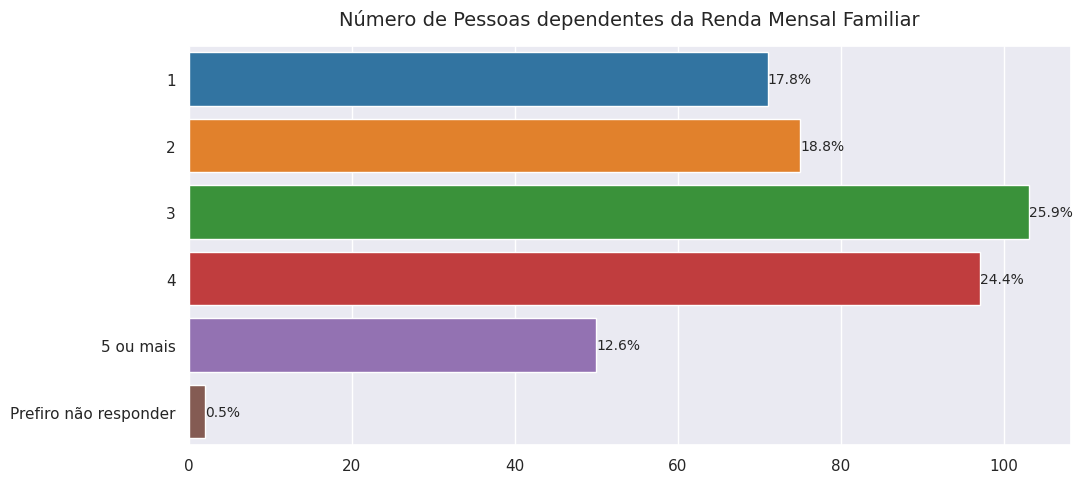

In [5]:
# Chamar função
plt = gerar_grafico_barras_horizontal(
    dados=df.dropna(),
    questao=variavel_alvo,
    respostas=ordem_grafico,
    titulo=titulo_grafico
)

plt.savefig('dependentes.pdf', bbox_inches='tight', dpi=300)
plt.show()